# Books Read in 2019

## Prep
Imports and set variables

In [1]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.style as style
%matplotlib inline

In [2]:
style.use('seaborn')
pd.set_option('mode.chained_assignment', None)
YEAR = 2019
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

Go to https://www.goodreads.com/review/import and click "Export Library". Rename to **books.csv**.

In [3]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [4]:
# The Ghost Map is missing Date Dead in Goodreads export.
books.at[books['Title'].str.startswith('The Ghost Map'), 'Date Read'] = '12/21/2019'
books.at[books['Title'].str.startswith('Exhalation'), 'Date Read'] = '10/16/2019'
books.at[books['Title'].str.startswith('Why We Sleep'), 'Date Read'] = '12/8/2019'
books.at[books['Title'].str.startswith('Conscious'), 'Original Publication Year'] = 2019
books['Date Read'] = pd.to_datetime(books['Date Read'])

Add Start Dates to books. The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [6]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"{}",'.format(bk, JAN1))
print('}')

{
"21 Lessons for the 21st Century":"1/1/2019",
"Mindfulness for Beginners":"1/1/2019",
"The Psychopath Test: A Journey Through the Madness Industry":"1/1/2019",
"The Border (Power of the Dog, #3)":"1/1/2019",
"The Gene: An Intimate History":"1/1/2019",
"Nobody's Fool":"1/1/2019",
"Empire Falls":"1/1/2019",
"Catch and Kill: Lies, Spies, and a Conspiracy to Protect Predators":"1/1/2019",
"Blood at the Root: A Racial Cleansing in America":"1/1/2019",
"Why We Sleep: Unlocking the Power of Sleep and Dreams":"1/1/2019",
"How We Got to Now: Six Innovations That Made the Modern World":"1/1/2019",
"The Ghost Map: The Story of London's Most Terrifying Epidemic--and How It Changed Science, Cities, and the Modern World":"1/1/2019",
"Conscious: A Brief Guide to the Fundamental Mystery of the Mind":"1/1/2019",
"The Sense of an Ending":"1/1/2019",
"All the Light We Cannot See":"1/1/2019",
"Moral Tribes: Emotion, Reason, and the Gap Between Us and Them":"1/1/2019",
"The Elephant in the Brain: Hidden 

Copy the above text and paste it below. Set it equal to **start_dates**. Replace the "1/1/00" with the correct start dates. This is required because the start date is not in the downloaded CSV. It must be manually retrieved. This can be done by going to the Read list and via settings adding a column for Date Started. 

In [7]:
start_dates = {
"The Handmaid's Tale":"9/29/2019",
"The Body: A Guide for Occupants":"11/2/2019",
"On Having No Head: Zen and the Rediscovery of the Obvious":"12/23/2019",
"Conscious: A Brief Guide to the Fundamental Mystery of the Mind":"11/3/2019",
"The Ghost Map: The Story of London's Most Terrifying Epidemic--and How It Changed Science, Cities, and the Modern World":"12/16/2019",
"How We Got to Now: Six Innovations That Made the Modern World":"12/8/2019",
"Why We Sleep: Unlocking the Power of Sleep and Dreams":"5/3/2019",
"Blood at the Root: A Racial Cleansing in America":"11/4/2019",
"The Happiness Hypothesis: Finding Modern Truth in Ancient Wisdom":"10/17/2019",
"Catch and Kill: Lies, Spies, and a Conspiracy to Protect Predators":"10/25/2019",
"Exhalation: Stories":"10/3/2019",
"The Elephant in the Brain: Hidden Motives in Everyday Life":"9/13/2019",
"Never Enough: The Neuroscience and Experience of Addiction":"9/4/2019",
"The Nickel Boys":"8/6/2019",
"The Great Alone":"9/7/2019",
"Moral Tribes: Emotion, Reason, and the Gap Between Us and Them":"5/11/2019",
"Sing, Unburied, Sing":"8/4/2019",
"All the Light We Cannot See":"6/7/2019",
"The Sense of an Ending":"6/8/2019",
"Lie to Me":"6/2/2019",
"An American Marriage":"5/29/2019",
"Empire Falls":"3/28/2019",
"Nobody's Fool":"4/25/2019",
"Educated":"4/15/2019",
"The Gene: An Intimate History":"1/13/2019",
"Straight Man":"3/23/2019",
"The Border (Power of the Dog, #3)":"2/26/2019",
"Moonglow":"5/6/2019",
"Mrs. Fletcher":"2/21/2019",
"The Leftovers":"2/10/2019",
"Tales from Both Sides of the Brain: A Life in Neuroscience":"1/26/2019",
"The Psychopath Test: A Journey Through the Madness Industry":"1/11/2019",
"Mindfulness for Beginners":"1/8/2019",
"21 Lessons for the 21st Century":"9/16/2018"
}

Verify that you filled in all of the dates

In [8]:
all_updated = True
for t, d in start_dates.items():
    if d == JAN1:
        print('Unchanged: ', t)
        all_updated = False
if all_updated:
    print('All start dates have been updated.')

All start dates have been updated.


Populate the Date Started column.

In [9]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [10]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [11]:
date_columns = ['Date Read', 'Date Added', 
                'Date Started']
for c in date_columns:
    books[c] = pd.to_datetime(books[c])

In [12]:
books = books.dropna(subset=['Date Read', 'Date Started'], how='all')

In [13]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

Manual removal. This is where can manually remove books you do not want in the plots.

In [14]:
to_remove = ['Mindfulness for Beginners']
books = books.drop(books[books.Title.isin(to_remove)].index)

In [15]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [16]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

21 Lessons for the 21st Century by Yuval Noah Harari (2018)
The Psychopath Test: A Journey Through the Madness Industry by Jon Ronson (2011)
The Leftovers by Tom Perrotta (2011)
Mrs. Fletcher by Tom Perrotta (2017)
The Border (Power of the Dog, #3) by Don Winslow (2019)
Straight Man by Richard Russo (1997)
The Gene: An Intimate History by Siddhartha Mukherjee (2016)
Educated by Tara Westover (2018)
Nobody's Fool by Richard Russo (1993)
Empire Falls by Richard Russo (2001)
An American Marriage by Tayari Jones (2018)
Lie to Me by J.T. Ellison (2017)
The Sense of an Ending by Julian Barnes (2011)
All the Light We Cannot See by Anthony Doerr (2014)
Moral Tribes: Emotion, Reason, and the Gap Between Us and Them by Joshua D. Greene (2013)
The Great Alone by Kristin Hannah (2018)
The Nickel Boys by Colson Whitehead (2019)
Never Enough: The Neuroscience and Experience of Addiction by Judith Grisel (2019)
The Elephant in the Brain: Hidden Motives in Everyday Life by Kevin Simler (2018)
Exhalati

## Calculations
Calculate Time to Read

In [17]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [18]:
books['Pages per Day'] = (books['Number of Pages'] / 
                          [x.days for x in books['Time to Read']])

Create a short title for some of the plots.

In [19]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])
books['Title (short)'] = books['Title (short)'].str.replace(r" \(.*\)","")

Sort books

In [32]:
books.sort_values(by='Date Started',ascending=False,inplace=True)

## Plotting

In [33]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color, False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)
ylabel_colors = ['black' if f else 'gray' for f in books['Finished']]

### Books Across the Year

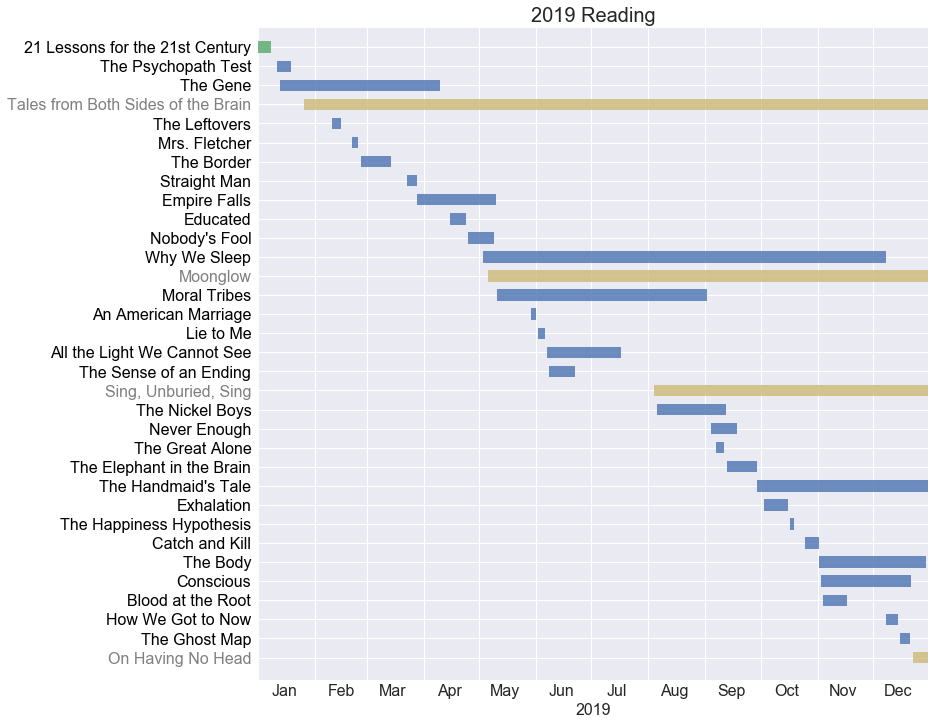

In [46]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, end_date - start_date, label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos, ylabels)
plt.setp(labelsy, fontname="Arial", fontsize = 16)
ax.set_ylim(bottom=-0.1, top=ilen*0.5+0.5)
[t.set_color(c) for c, t in zip(ylabel_colors, ax.yaxis.get_ticklabels())]

ax.xaxis_date()
ax.set_xlim(left=_create_date(datetime.datetime(YEAR, 1, 1)),
           right=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

plt.title('{} Reading'.format(YEAR), fontname="Arial", fontsize=20)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 
    
plt.savefig('books_timeline_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Book Ratings

Average Personal Goodread Rating: 3.5172413793103448
Average Site Goodread Rating: 4.102758620689656


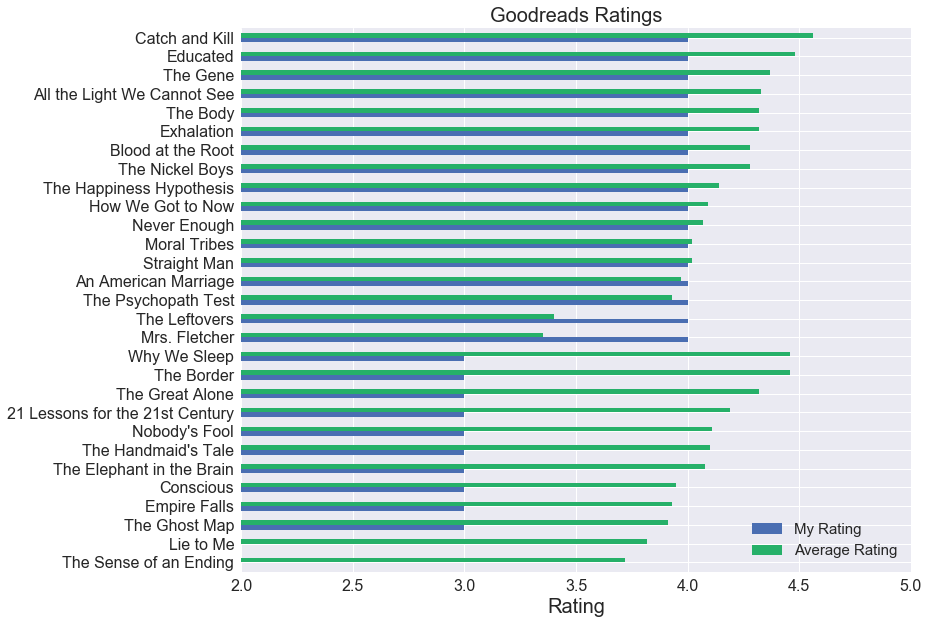

In [23]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating',
                                                                     'Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',
                                                 xlim=(2,5),
                                                 figsize=(12,10),
                                                 fontsize=16,
                                                 color=('#4A6EB2', '#26B069'))
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=20)
plt.title('Goodreads Ratings', fontsize=20);
mpl.rcParams['legend.fontsize'] = 'large'
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())
plt.legend(fontsize=15)

plt.savefig('ratings_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Number of Pages

Total Number of Pages: 10844.0


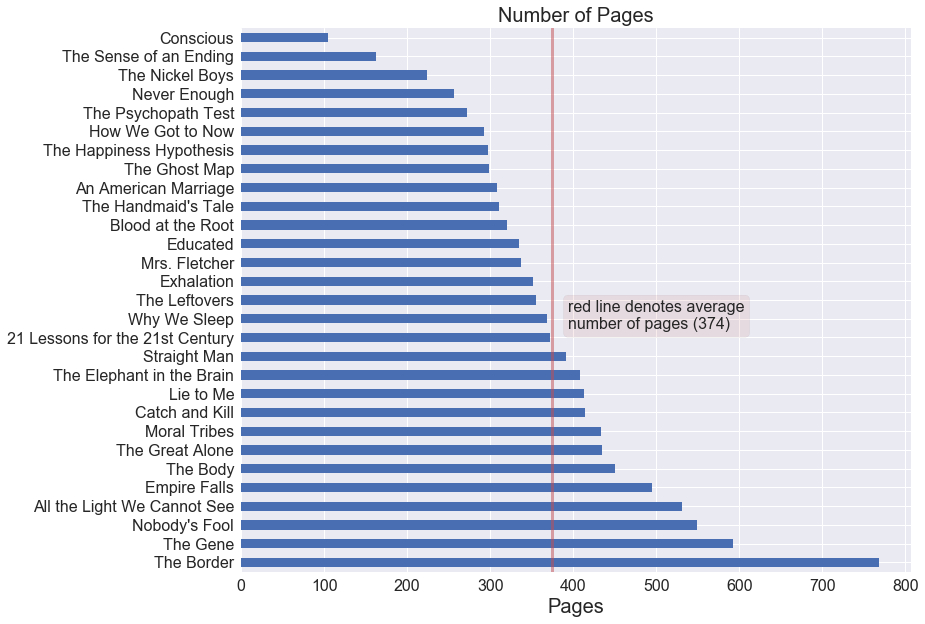

In [24]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                                 title='Number of Pages',
                                                                 figsize=(12,10),
                                                                 fontsize=16,
                                                                 color='#4A6EB2')
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 14, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
plt.title('Number of Pages', fontsize=20)
print ('Total Number of Pages:',books_['Number of Pages'].sum())

plt.savefig('num_pages_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

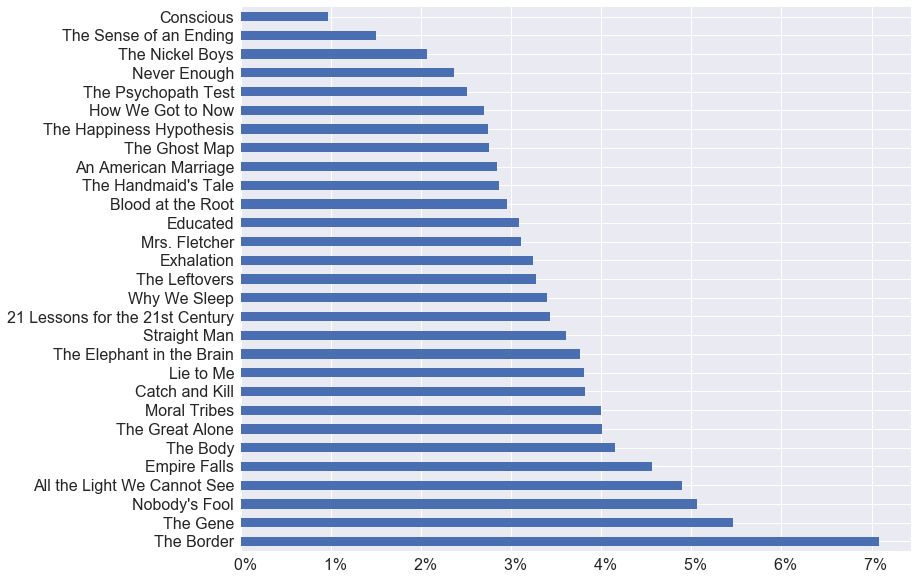

In [25]:
books_ = books[books['Finished'] == True]

books_.loc[:, 'Percent'] = books_['Number of Pages'] / books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh', 
                                                         figsize=(12,10),
                                                         fontsize=16,
                                                         color='#4A6EB2')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 29.70958904109589


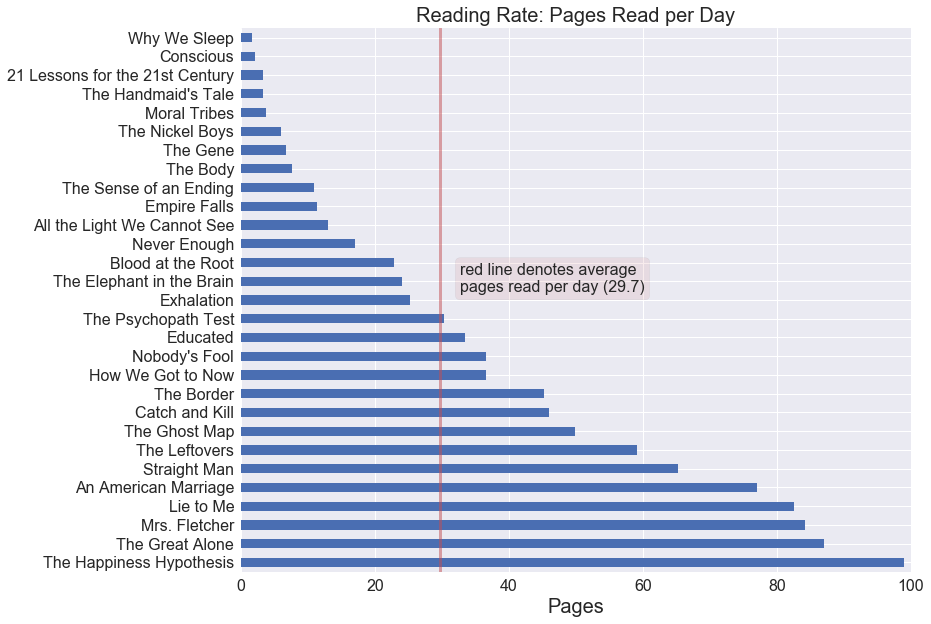

In [30]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),
                                                               figsize=(12,10),
                                                               fontsize=16,
                                                               color='#4A6EB2')
ax.yaxis.label.set_visible(False)
plt.title('Reading Rate: Pages Read per Day', fontsize=20)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 16, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
print ('Average Number of Pages over Year:',avg)

plt.savefig('pages_per_day_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Publication Dates

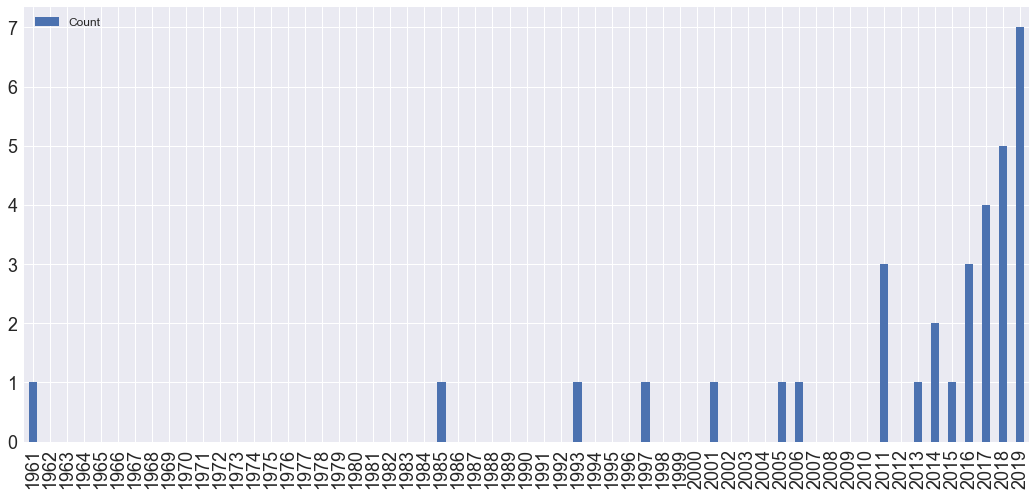

In [27]:
books_ = books.copy()
books_['T'] = books_.index
books_.reset_index(drop=True,inplace=True)
books_ = books_[['Original Publication Year','T']]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)

years = list(range(books_['Original Publication Year'].min(), 
                   books_['Original Publication Year'].max()+1))
occurs = books_['Original Publication Year'].value_counts()
occurs_ = pd.DataFrame(index=years, columns=['Count'])
occurs_['Count'] = occurs
occurs = occurs_.fillna(0) 
ax = occurs.plot(kind='bar',figsize=(18,8),fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

## Some Stats
Average Number of Pages per Day over Year

In [29]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print('Average Number of Pages per Day over Year:', books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 28.761310303752236
